In [1]:
%pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, accuracy_score


In [3]:
#Read the csv file
dataset = pd.read_csv('data/2_resampled_heart_attack_data.csv')
# dataset

In [4]:
# Splitting the dataset into features and target variable
X = dataset.drop('Heart Attack Risk', axis=1)
y = dataset['Heart Attack Risk']


In [5]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

In [7]:
# Initialize the SVM model
svm_model = SVC()

In [8]:
# Define the hyperparameter grid for the SVM model
param_dist = {
    'C': [0.1, 1],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1],
    'degree': [2, 3]
}

In [9]:
# Initialize the randomized search with cross-validation
random_search = RandomizedSearchCV(svm_model, param_dist, cv=5, scoring='roc_auc', n_iter=100, random_state=42)

In [10]:
# Fit the random search to the scaled training data
random_search.fit(X_train_scaled, y_train)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 16 is smaller than n_iter=100. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=100,
                   param_distributions={'C': [0.1, 1], 'degree': [2, 3],
                                        'gamma': [0.1, 1],
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='roc_auc')

In [11]:
# Get the best hyperparameters
best_params = random_search.best_params_
print(f'Best hyperparameters: {best_params}')

Best hyperparameters: {'kernel': 'rbf', 'gamma': 1, 'degree': 2, 'C': 1}


In [12]:
# Get the best estimator (model with best hyperparameters)
best_svm_model = random_search.best_estimator_

In [13]:
# Make predictions with the best model on the scaled test data
y_pred = best_svm_model.predict(X_test_scaled)

In [14]:
# Evaluate the model's performance
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)

Precision: 0.9770114942528736
Recall: 0.1504424778761062
F1 Score: 0.2607361963190184
ROC AUC: 0.5734355246523388


In [15]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the best SVM model with scaling: {roc_auc:.2f}')

Accuracy of the best SVM model with scaling: 0.57


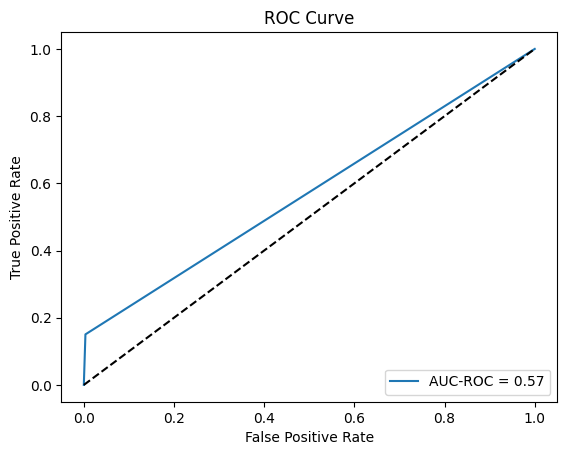

In [16]:
# ROC Curve and AUC-ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label=f'AUC-ROC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show() 

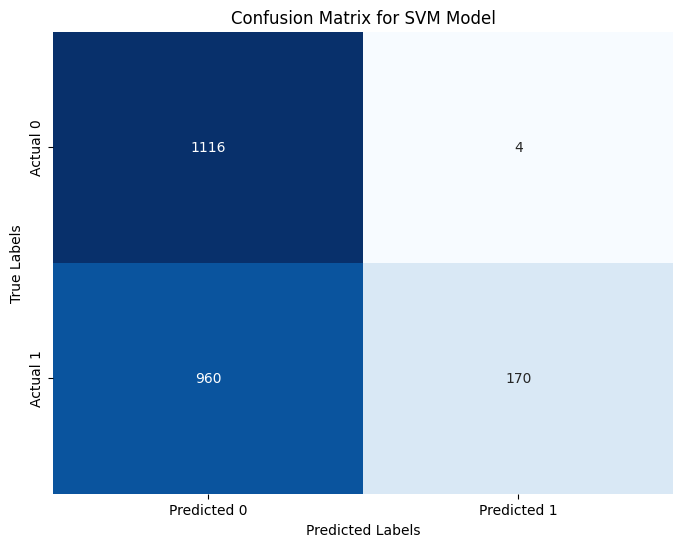

In [18]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVM Model')
plt.show()